## Use Case - Klassifikation der Herkunft von Automodellen anhand ausgewählter Features

In [1]:
# import 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import missingno as msno

In [2]:
mpg = sns.load_dataset('mpg')

<Axes: >

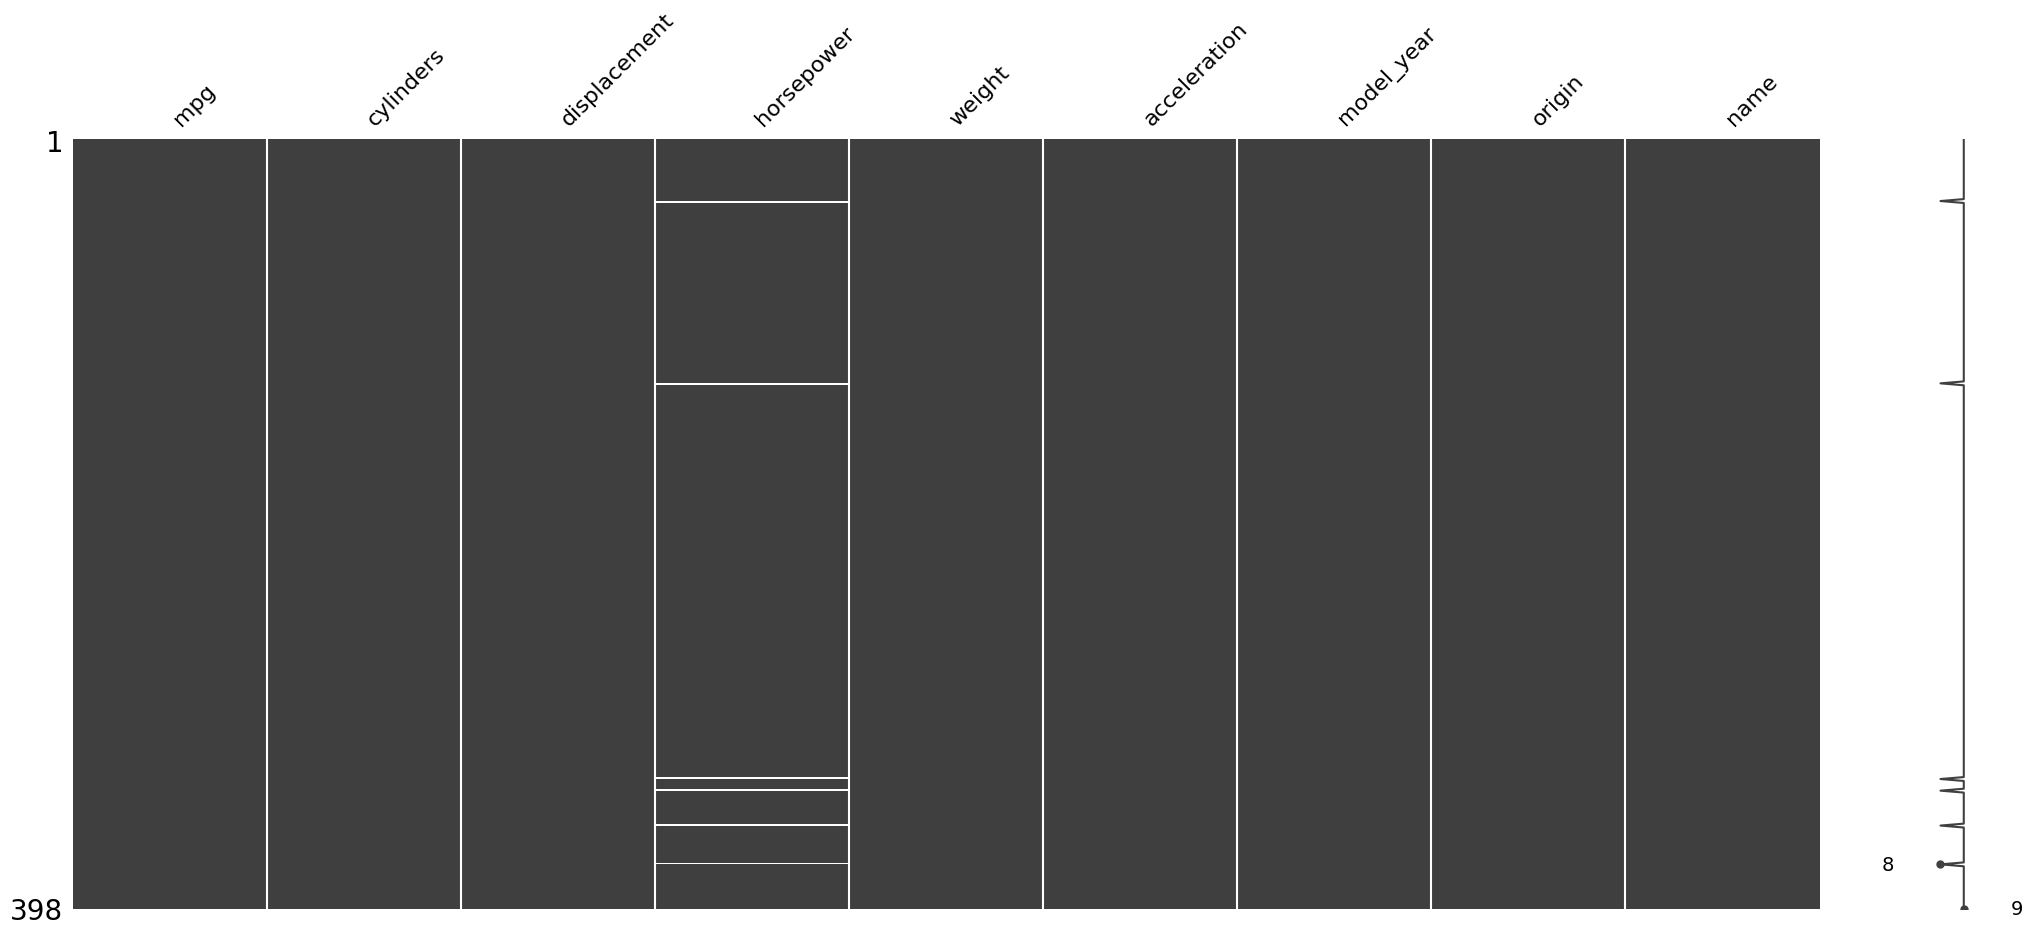

In [3]:
msno.matrix(mpg)

In [4]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()

horsepower = mpg[['horsepower']].copy()

mpg.horsepower = imputer.fit_transform(horsepower)

<Axes: >

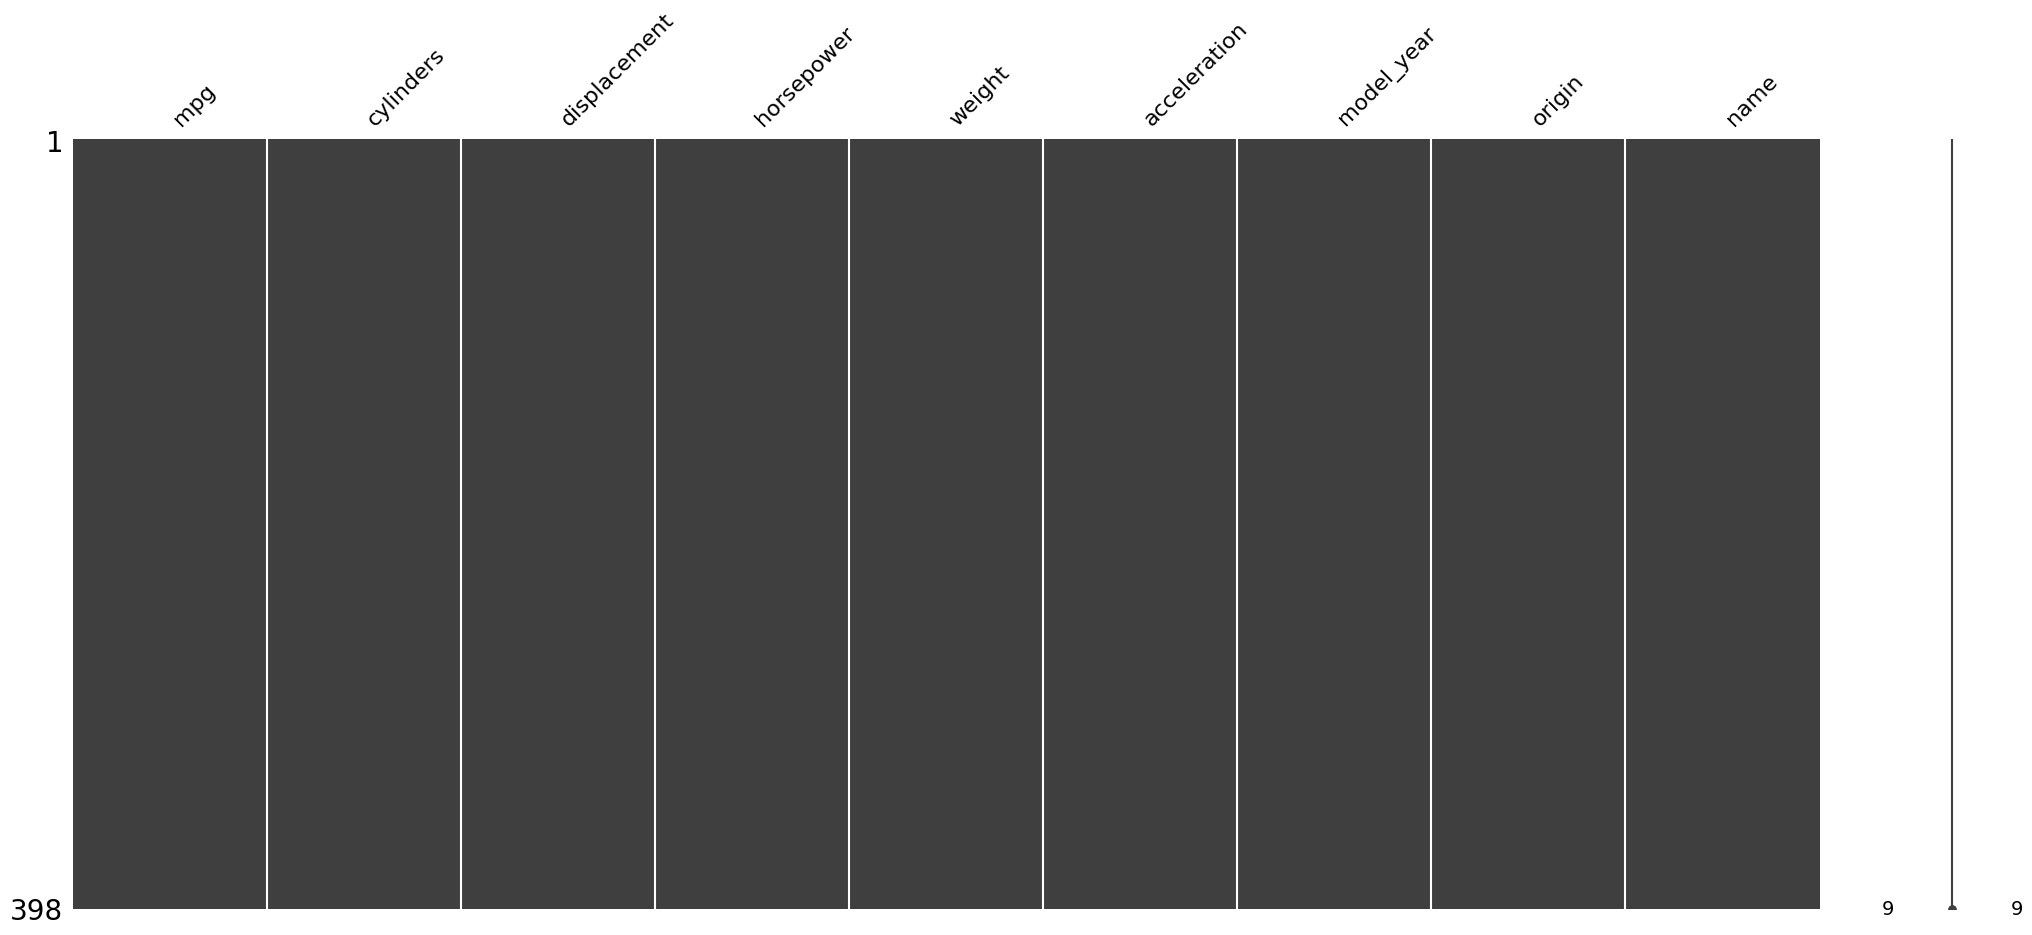

In [5]:
msno.matrix(mpg)

In [6]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [7]:
X = mpg.iloc[:,:-2]
y = mpg.origin

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [8]:
classifier = DecisionTreeClassifier(max_depth=10)

In [9]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [10]:
classifier.score(X_test,y_test)

0.8375

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay

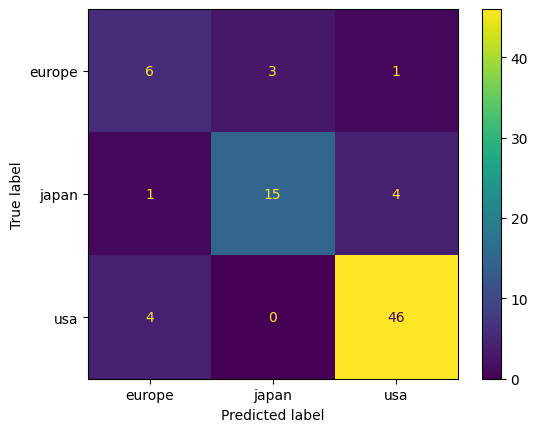

In [13]:
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)

In [14]:
# Now with Normalization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

mpg_numeric = mpg.iloc[:,:-3]

mpg.iloc[:,:-3] = scaler.fit_transform(mpg_numeric)

In [15]:
X = mpg.iloc[:,:-2]
y = mpg.origin

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [16]:
classifier = DecisionTreeClassifier(max_depth=10)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [17]:
classifier.score(X_test,y_test) #leicht bessere Performance

0.825

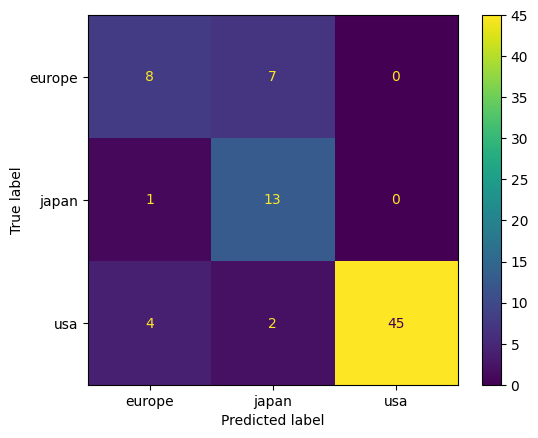

In [19]:
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)